In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import tensorflow 

from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D,MaxPooling2D,Flatten,Dropout
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
#define the data directory and the image features
#base_dir = './dataset_label'
base_dir = 'D:\\project_235C_dataset\\resource\\dataset_label'
train_data_dir = os.path.join(base_dir, 'train_data')
validation_data_dir = os.path.join(base_dir, 'Validation')
test_data_dir = os.path.join(base_dir, 'Testing')

img_width, img_height = 128, 128
input_shape=(img_width, img_height,3)
batch_size=64

In [3]:
base_model=MobileNet(weights='imagenet',include_top=False,input_shape= input_shape) 

x=base_model.output

#x = Flatten()(x)
#x = MaxPooling2D(4)(x)
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x = Dropout(0.3)(x)
x=Dense(512,activation='relu')(x) 
x = Dropout(0.3)(x)
x=Dense(512,activation='relu')(x) 
x = Dropout(0.3)(x)
output=Dense(1,activation='sigmoid')(x) 

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
new_model=Model(inputs=base_model.input,outputs=output)

In [5]:
for i,layer in enumerate(new_model.layers):
    print(i,layer.name)
#print(len(new_model.layers))

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [6]:
for layer in new_model.layers:
    layer.trainable=False
for layer in new_model.layers[:74]:
    layer.trainable=False
for layer in new_model.layers[74:]:
    layer.trainable=True
    
    import pandas as pd

        
layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.ZeroPadding2D obje...,conv1_pad,False
2,<keras.layers.convolutional.Conv2D object at 0...,conv1,False
3,<keras.layers.normalization.BatchNormalization...,conv1_bn,False
4,<keras.layers.advanced_activations.ReLU object...,conv1_relu,False
5,<keras.layers.convolutional.DepthwiseConv2D ob...,conv_dw_1,False
6,<keras.layers.normalization.BatchNormalization...,conv_dw_1_bn,False
7,<keras.layers.advanced_activations.ReLU object...,conv_dw_1_relu,False
8,<keras.layers.convolutional.Conv2D object at 0...,conv_pw_1,False
9,<keras.layers.normalization.BatchNormalization...,conv_pw_1_bn,False


In [7]:
image_data_generator=ImageDataGenerator(
                        rescale=1./255,   #normalization
                        shear_range=0.2,
                        zoom_range=0.2,  # Randomly zoom image  
                        horizontal_flip=True)  #horizontally flip images

#generate the train data generator
train_generator=image_data_generator.flow_from_directory(train_data_dir, 
                                                 target_size=(img_width, img_height),
                                                 batch_size=batch_size,
                                                 class_mode='binary',
                                                 shuffle=True)

Found 1441 images belonging to 2 classes.


In [8]:
valid_datagenerator = ImageDataGenerator(rescale=1./255)
validation_generator = valid_datagenerator.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 494 images belonging to 2 classes.


In [9]:
step_size_val = validation_generator.n//validation_generator.batch_size
print(step_size_val)

7


In [10]:
#lr = 0.01
#adam = Adam(lr=lr)
new_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
history=new_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                   validation_data=validation_generator,
                   #validation_steps= step_size_val,  
                   verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
22/22 [==============================] - 191s 9s/step - loss: 0.4815 - accuracy: 0.8118 - val_loss: 0.7235 - val_accuracy: 0.8259
Epoch 2/10
22/22 [==============================] - 186s 8s/step - loss: 0.1931 - accuracy: 0.9227 - val_loss: 1.2020 - val_accuracy: 0.7611
Epoch 3/10
22/22 [==============================] - 220s 10s/step - loss: 0.1319 - accuracy: 0.9503 - val_loss: 2.6735 - val_accuracy: 0.7632
Epoch 4/10
22/22 [==============================] - 177s 8s/step - loss: 0.0811 - accuracy: 0.9703 - val_loss: 2.6020 - val_accuracy: 0.7551
Epoch 5/10
22/22 [==============================] - 179s 8s/step - loss: 0.0686 - accuracy: 0.9746 - val_loss: 0.6929 - val_accuracy: 0.9150
Epoch 6/10
22/22 [==============================] - 168s 8s/step - loss: 0.0336 - accuracy: 0.9908 - val_loss: 0.0386 - val_accuracy: 0.9251
Epoch 7/10
22/22 [==============================] - 177s 8s/step - loss: 0.0737 - accuracy: 0.9717 - val_

Text(0.5,1,'Training and Validation loss')

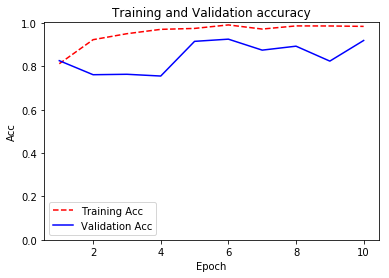

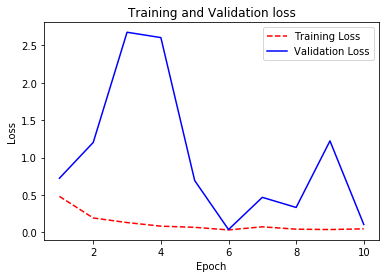

In [32]:
import matplotlib.pyplot as plt
# generate the accuracy and loss for each training epoch
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.ylim(ymin=0)
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation loss')



dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


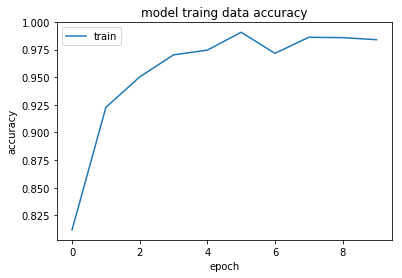

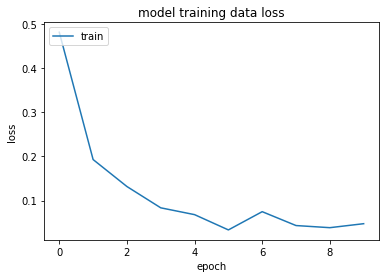

In [12]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model traing data accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model training data loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
new_model.metrics_names

['loss', 'accuracy']

In [14]:
#result=new_model.evaluate_generator(generator=validation_generator,steps=162)
#print(result)

In [15]:
result=new_model.evaluate_generator(generator=validation_generator,workers = 12)
print(result)

[0.4901033937931061, 0.9190283417701721]


In [16]:
print("Model loss is %f, accuracy is %f "%(result[0],result[1]))

Model loss is 0.490103, accuracy is 0.919028 


In [17]:
from keras.models import load_model

new_model.save('model_using_Mobilenet_ImageNet')

In [18]:
model = load_model('model_using_Mobilenet_ImageNet')

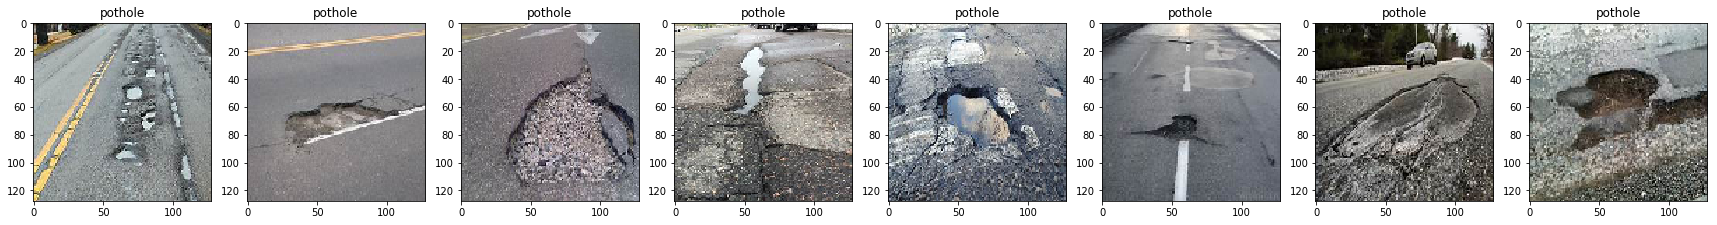

In [19]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt

cnt=0

#fig, axs = plt.subplots(3, 8, figsize=(30, 50))
fig, axs = plt.subplots(ncols=8, figsize=(30, 50))
for eachFile in os.listdir("D:\\project_235C_dataset\\resource\\dataset_label/Testing/Positive/"):
    
    path = "D:\\project_235C_dataset\\resource\\dataset_label/Testing/Positive/"+eachFile
    image = load_img(path, target_size=(128,128))

    image_arr = img_to_array(image) 
    
    image_arr = np.expand_dims(image_arr, axis=0)
    image_arr /= 255
    prediction_array = model.predict(image_arr)
    axs[cnt].imshow(image)
    
    # threshold
    if prediction_array[0][0] > 0.3:
        axs[cnt].set_title("pothole")    
        
    else: 
        axs[cnt].set_title("not pothole", color = 'r')
        
    cnt+=1
    if cnt >= 8:
        break

    

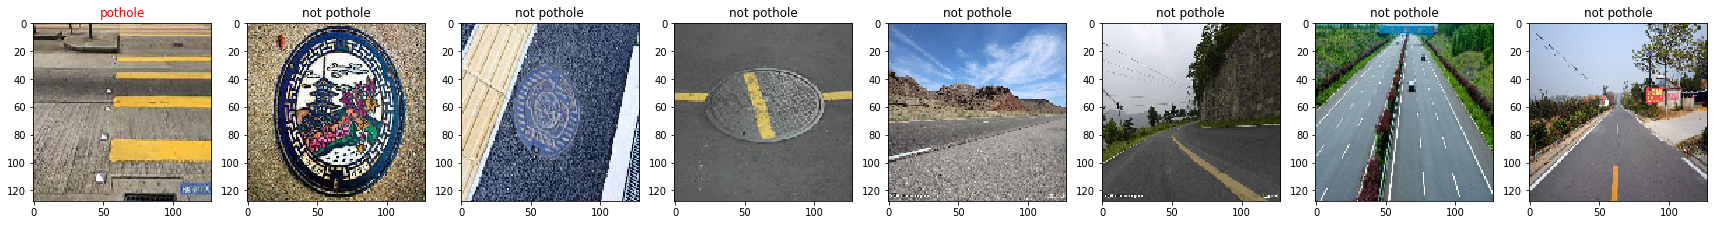

In [20]:
cnt=0
#fig, axs = plt.subplots(3, 8, figsize=(30, 50))
fig, axs = plt.subplots(ncols=8, figsize=(30, 50))
for eachFile in os.listdir("D:\\project_235C_dataset\\resource\\dataset_label/Testing/Negative/"):
    
    path = "D:\\project_235C_dataset\\resource\\dataset_label/Testing/Negative/"+eachFile
    image = load_img(path, target_size=(128,128))

    image_arr = img_to_array(image) 
    
    image_arr = np.expand_dims(image_arr, axis=0)
    image_arr /= 255
    prediction_array = model.predict(image_arr)
    axs[cnt].imshow(image)
    if prediction_array[0][0] > 0.3:
        axs[cnt].set_title("pothole",color = 'r')
        
    else: 
        axs[cnt].set_title("not pothole")
        
    cnt+=1
    if cnt >= 8:
        break

In [26]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
#import model_evaluation_utils as meu
%matplotlib inline

IMG_DIM = (128, 128)
input_shape = (128, 128, 3)

num2class_label_transformer = lambda l: ['not pothole' if x < 0.3 else 'pothole' for x in l]
class2num_label_transformer = lambda l: [1 if x.endswith('p') or x.startswith('extra') else 0 for x in l]


In [27]:
test_files =glob.glob("D:\\project_235C_dataset\\resource\\dataset_label\\test\\*")
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in test_files]
#print(test_labels)

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)  # ture labels

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])


Test dataset shape: (409, 128, 128, 3)
['10n', '10p', '11n', '11p', '12n'] [0, 1, 0, 1, 0]


In [28]:
import model_evaluation_utils as meu
predictions = model.predict(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=num2class_label_transformer(test_labels_enc), predicted_labels=predictions, 
                                      classes=list(set(num2class_label_transformer(test_labels_enc))))


Model Performance metrics:
------------------------------
Accuracy: 0.8729
Precision: 0.885
Recall: 0.8729
F1 Score: 0.8753

Model Classification report:
------------------------------
             precision    recall  f1-score   support

    pothole       0.95      0.86      0.90       275
not pothole       0.76      0.90      0.82       134

avg / total       0.89      0.87      0.88       409


Prediction Confusion Matrix:
------------------------------
                    Predicted:            
                       pothole not pothole
Actual: pothole            236          39
        not pothole         13         121


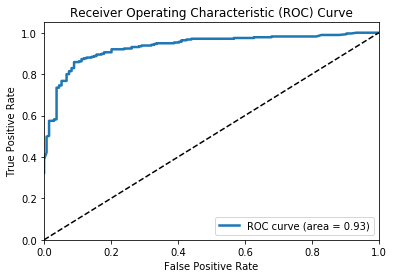

In [29]:
from sklearn.metrics import roc_curve, auc 
fpr, tpr, _ = roc_curve(test_labels_enc, model.predict(test_imgs_scaled, verbose=0))   
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'.format(roc_auc), linewidth=2.5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
print(confusion_matrix(num2class_label_transformer(test_labels_enc), predictions, labels=None, sample_weight=None))

[[121  13]
 [ 39 236]]


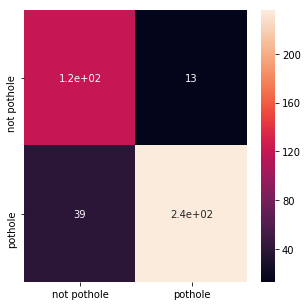

In [34]:
import pandas as pd
cm=confusion_matrix(num2class_label_transformer(test_labels_enc), predictions, labels=None, sample_weight=None)
plt.figure(figsize = (5,5))
df_cm = pd.DataFrame(cm, index = [i for i in ['not pothole','pothole']],
                  columns = [i for i in ['not pothole','pothole']])

ax=sns.heatmap(df_cm, annot=True)